# Invasive Ductal Cancer

In [219]:
%load_ext autoreload
%autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [220]:
from idc.gradcam import make_heatmap, superimpose_heatmap

In [221]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from PIL import Image as Image

# Display
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [222]:
# Running locally
X = np.load('../idc/data/X.npy')
y = np.load('../idc/data/Y.npy')

## Baseline CNN Model

In [223]:
X_scaled = X/255

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [224]:
from tensorflow.keras import models
from tensorflow.keras import Sequential, layers
from keras.models import load_model

In [225]:
model = load_model('../models/model4.h5')
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 50, 50, 16)        208       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 50, 50, 32)        2080      
_________________________________________________________________
flatten_2 (Flatten)          (None, 80000)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 80001     
Total params: 82,289
Trainable params: 82,289
Non-trainable params: 0
_________________________________________________________________


In [226]:
img_array = np.expand_dims(X_train[10],0)

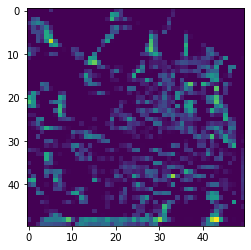

In [227]:
heatmap = make_heatmap(img_array, model)
plt.imshow(heatmap);

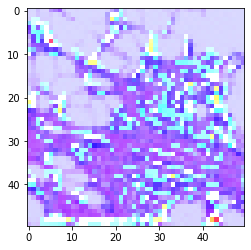

In [228]:
superimpose = superimpose_heatmap(X_train[10], heatmap)
plt.imshow(superimpose);

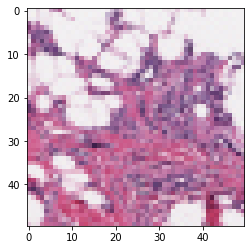

In [229]:
plt.imshow(X_train[10]);